<a href="https://colab.research.google.com/github/oleksandragolub/Progetto-Machine-Learning/blob/main/progetto_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning**

---
---

Università degli Studi Milano Bicocca \
CdLM Informatica — AA 2024/2025

---
---

#### **Componenti del gruppo:**
— Oleksandra Golub (856706) \
— Giovanni Bishara (869532) \
— Federico Brambilla (886046)

---
---

### **Librerie e strumenti per il preprocessing e la modellazione in ML**



Queste righe di codice importano le librerie necessarie per il preprocessing dei dati, la gestione dei dataset e la loro visualizzazione, oltre a strumenti per il bilanciamento dei dati e l'implementazione di modelli di machine learning:
- **kagglehub** è una libreria per scaricare dataset direttamente da Kaggle (permette di scaricare automaticamente i dati senza doverli caricare manualmente).
- il modulo **os** permette di interagire con il sistema operativo (utile per verificare la posizione di un dataset scaricato).
- **pandas** è una libreria per la gestione e manipolazione dei dataset (permette di leggere, analizzare e trasformare i dati in formato tabellare).
- **matplotlib.pyplot** è una libreria per creare grafici e visualizzazioni (aiuta a visualizzare distribuzioni, istogrammi e grafici di correlazione).
- **seaborn** è una libreria per la visualizzazione avanzata dei dati basata su **matplotlib** (aiuta a creare grafici più leggibili e dettagliati per analizzare le relazioni tra le variabili).
- **numpy** è una libreria per il calcolo numerico e la gestione degli array (utilizzata per manipolare dati numerici, eseguire calcoli e operazioni vettorial).
- **SMOTE** (Synthetic Minority Over-sampling Technique) è una tecnica di oversampling per bilanciare dataset sbilanciati. Genera nuovi esempi sintetici della classe minoritaria (es. se i pazienti diabetici sono meno numerosi, SMOTE genera nuovi dati simili per bilanciare il dataset).
- **StandardScaler** e **PowerTransformer** sono strumenti per trasformare e normalizzare i dati:
  1.   **StandardScaler** ridimensiona i dati in modo che abbiano *media 0* e *deviazione standard 1* (necessario per molti algoritmi di ML).
  2.   **PowerTransformer** applica una trasformazione (es. logaritmica) per rendere più normale la distribuzione dei dati.
- **enable_iterative_imputer** è necessario per abilitare **IterativeImputer**, che è ancora un'API sperimentale in **scikit-learn** (permette di eseguire un'imputazione avanzata dei valori mancanti stimandoli in base alle altre feature).
- **IterativeImputer** è un metodo per riempire i valori mancanti nei dati in modo intelligente (stima i valori basandosi sulle altre feature, anziché usare semplici medie o mediane).
- **train_test_split** è una funzione di **scikit-learn** per suddividere i dati in training set e test set (permette di addestrare il modello su una parte dei dati e testarlo su un'altra parte per valutarne le prestazioni).

Modelli di Machine Learning:
- **DecisionTreeClassifier** implementa un albero di decisione, un modello che suddivide i dati in base a domande sequenziali per fare previsioni.
- **plot_tree** è una funzione che permette di visualizzare la struttura dell'albero di decisione addestrato. È utile per interpretare il modello, capire quali feature sono state utilizzate per le suddivisioni e come il modello prende le decisioni.
- **LogisticRegression** è un modello statistico di classificazione binaria basato sulla funzione logistica (sigmoide). Stima la probabilità che un'osservazione appartenga a una classe specifica.
- **SVC (Support Vector Classifier)** è un potente modello per la classificazione. Trova un iperpiano ottimale che separa le classi massimizzando la distanza tra loro. Può utilizzare diversi kernel (lineare, polinomiale, RBF, ecc).
- **GaussianNB (Naive Bayes Gaussiano)** è basato sul **Teorema di Bayes**, assume che le feature siano indipendenti tra loro. La variante GaussianNB è utilizzata quando le feature seguono una distribuzione normale (gaussiana). È molto veloce e adatto a dataset di grandi dimensioni.
- **RandomForestClassifier** è un modello ensemble che combina più alberi di decisione per migliorare l'accuratezza e ridurre l'overfitting. Ogni albero riceve un sottoinsieme casuale dei dati (bagging) e fa una previsione. Il risultato finale è dato dalla maggioranza delle previsioni degli alberi. È molto potente, flessibile e meno sensibile ai dati rumorosi.

Metriche di valutazione dei modelli:
- **accuracy_score(y_true, y_pred)** serve per calcolare l'accuratezza, ossia la percentuale di previsioni corrette.
- **precision_score(y_true, y_pred)** serve per indicare la percentuale di predizioni corrette tra quelle che il modello ha classificato come positive. Utile per problemi con classi sbilanciate.
- **recall_score(y_true, y_pred)** serve per misurare quanti dei veri positivi il modello è riuscito a identificare.
- **f1_score(y_true, y_pred)** serve per ottenere la media armonica tra precisione e recall. Utile quando è importante trovare un bilanciamento tra precisione e recall.
- **confusion_matrix(y_true, y_pred)** serve per creare una matrice di confusione, che mostra il numero di predizioni corrette e errate suddivise per classe. Utile per analizzare dove il modello sta sbagliando.

In [285]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

---
---
### **Dataset**

#### **Caricamento del dataset**


Queste righe di codice servono per scaricare, caricare e verificare il dataset sui pazienti diabetici:
1. Scaricamento del dataset da Kaggle
  - si utilizza `kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")` per scaricare automaticamente il dataset "`diabetes-dataset-using-many-medical-metrics`" da [Kaggle](https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics/data).
  - la variabile `dataset_path` conterrà il percorso della cartella in cui il dataset è stato salvato.
  - il percorso del dataset viene stampato per verificare che l'operazione sia riuscita correttamente.

2. Definizione del percorso locale del dataset
  - `dataset_path` viene definito manualmente per specificare dove è stato scaricato il dataset.
  - normalmente, kagglehub salva i file in una cartella cache, quindi impostiamo manualmente il percorso corretto per evitarne la ricerca.
  - alcune versioni di kagglehub non restituiscono il percorso completo del dataset, quindi questa operazione aiuta a evitare problemi di accesso ai file.

3. Verifica dei file scaricati
  - `os.listdir(dataset_path)` stampa l'elenco dei file presenti nella cartella del dataset.
  - questo permette di verificare quali file sono stati effettivamente scaricati.
  - è utile soprattutto quando non si è sicuri del nome esatto del file CSV nel dataset.

4. Caricamento del dataset in Pandas
  - `pd.read_csv(dataset_path + "/diabetes (1).csv")` legge il file CSV e lo carica in un DataFrame Pandas.

Ora il dataset è pronto per essere esplorato e analizzato con Pandas!

In [286]:
dataset_path = kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")
print("Il dataset è stato scaricato in:", dataset_path)

dataset_path = "/root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1"

print(os.listdir(dataset_path))

df = pd.read_csv(dataset_path + "/diabetes (1).csv")

Il dataset è stato scaricato in: /root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1
['diabetes (1).csv']


* `df.head()` restituisce le prime 5 righe (di default) del DataFrame Pandas. È utile per verificare se i dati sono stati caricati correttamente e per analizzare un'anteprima del dataset.

In [287]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*  `df` visualizza tutto il dataset presente nel DataFrame Pandas.

In [252]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### **Cast delle colonne e label encoding per il target**


È essenziale verificare e, se necessario, effettuare il cast dei tipi delle feature e del target. Questo passaggio garantisce che i dati vengano interpretati correttamente durante le analisi, evitando errori dovuti a una rappresentazione errata o incoerente dei tipi di dati disponibili.

*   `df.dtypes` determina se una colonna contiene numeri interi (int64), numeri decimali (float64), stringhe (object), valori booleani (bool), o categorie (category).
*   `dtype: object` significa che l'elenco dei tipi di dato è memorizzato come un oggetto generico in Pandas.

In [288]:
# Tipi di dato per capire se servono cast
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


Da notare che la colonna `Outcome` deve essere castata a `category`, perché rappresenta una variabile categorica (classi 0 e 1).

Per il resto delle colonne non è necessario alcun cast. Le variabili sono già correttamente rappresentate come float64 per valori continui o int64 per valori discreti.

In [289]:
# Cast della colonna Outcome a category
df['Outcome'] = df['Outcome'].astype('category')

# Verifica dei tipi aggiornati
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,category


#### **Controllo iniziale del dataset**


Questa sezione include una serie di analisi preliminari per comprendere la struttura, la distribuzione e le relazioni tra le feature del dataset prima di qualsiasi preprocessing.

*   `df.shape` mostra il numero di righe e colonne del dataset.


In [290]:
df.shape

(768, 9)

* `df.isnull().sum()` è un comando che consente di verificare la presenza di valori mancanti (nulli) in ogni colonna di un DataFrame.

In [291]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Siccome non è necessario eliminare i valori nulli, procediamo con:

* `df.duplicated()` è un comando che permette di identificare il numero di righe duplicate all'interno di un DataFrame.

In [292]:
df.duplicated().sum()

0

Siccome non è necessario eliminare i valori duplicati, procediamo con:
*  `df.info()` fornisce informazioni riassuntive sulla struttura del DataFrame Pandas, dove:
  - `<class 'pandas.core.frame.DataFrame'>` indica che il dataset è un DataFrame Pandas.
  - `RangeIndex: 768 entries, 0 to 767` indica che il dataset ha 768 righe, numerate da 0 a 767.
  - `Data columns (total 9 columns)`indica che il dataset contiene 9 colonne.
  - Dettagli delle colonne includono i nominativi delle colonne, Non-Null Count (si vede che tutte le colonne hanno 768 valori non nulli, quindi non ci sono valori mancanti) e Dtype (per indicare colonne che contengono numeri interi e colonne che contengono numeri decimali)
  - `dtypes: category(1), float64(2), int64(6)`,  indica che nel dataset ci sono 1 colonna con tipo categorico, 2 colonne con tipo float64 (numeri decimali) e 6 colonne con tipo int64 (numeri interi).
  - `memory usage: 54.1 KB`indica che il dataset occupa 49.0 KB di memoria.

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


#### **Descrizione del dataset**


Il dataset analizza le caratteristiche cliniche di pazienti per la classificazione binaria della presenza o assenza di diabete. Ogni riga rappresenta un paziente, mentre le colonne contengono misurazioni mediche e dati anamnestici.

##### **Feature del dataset**
Le variabili disponibili nel dataset includono misurazioni fisiologiche, anamnestiche e indici metabolici, espressi come valori numerici continui o interi:

- Pregnancies: numero di gravidanze della paziente (solo per donne, nei dati non è specificato il sesso).
- Glucose (mg/dL): livello di glucosio nel sangue a digiuno.
- BloodPressure (mmHg): pressione arteriosa diastolica.
- SkinThickness (mm): spessore della pelle del tricipite, indicativo del grasso corporeo sottocutaneo.
- Insulin (µU/mL): livello di insulina nel sangue.
- BMI (kg/m²): indice di massa corporea, utile per valutare il peso corporeo rispetto all'altezza.
- DiabetesPedigreeFunction: funzione che stima la probabilità di sviluppare diabete in base alla storia familiare (valori più alti indicano una maggiore predisposizione genetica).
- Age (anni): età del paziente.
- Outcome: variabile target (0 = non diabetico, 1 = diabetico).

##### **Tipologia dei dati**
- Le feature sono numeriche continue e discrete.
- La variabile Outcome è categorica binaria (0/1).

##### **Obiettivo dell’analisi**
L’obiettivo del dataset è costruire un modello di classificazione binaria per predire la presenza di diabete in base ai valori clinici dei pazienti.

#### **Analisi del dataset**


##### **Distribuzione delle classi nel dataset**


L'analisi della distribuzione delle classi nel dataset è essenziale per comprendere eventuali squilibri, perciò procediamo con:

* `df["Outcome"].value_counts()` restituisce il conteggio di ogni valore unico presente nella colonna `Outcome` del DataFrame Pandas. Questo è utile per verificare la distribuzione delle classi nel dataset e **determinare se è bilanciato o meno**.
  - colonna `Outcome` del DataFrame rappresenta l'etichetta target, dove `1` indica la presenza di diabete, mentre `0` indica l'assenza di diabete.
  - `.value_counts()` conta il numero di occorrenze di ciascun valore unico presente nella colonna.


In [294]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


* sns.countplot(x='Outcome', data=df):
  - si usa **seaborn**, una libreria per la visualizzazione dei dati, per creare un grafico a barre che conta la frequenza di ciascun valore nella colonna `Outcome`.
  - `x='Outcome'` specifica che i valori della colonna `Outcome` saranno visualizzati sull'asse x.
  - `data=df` specifica che i dati sono contenuti nel DataFrame `df`.

In altre parole, questo blocco di codice è usato per visualizzare graficamente la distribuzione delle classi nella colonna `Outcome` del dataset. Questa distribuzione rappresenta il bilanciamento tra i valori target, ossia `0` (assenza di diabete) e `1` (presenza di diabete).

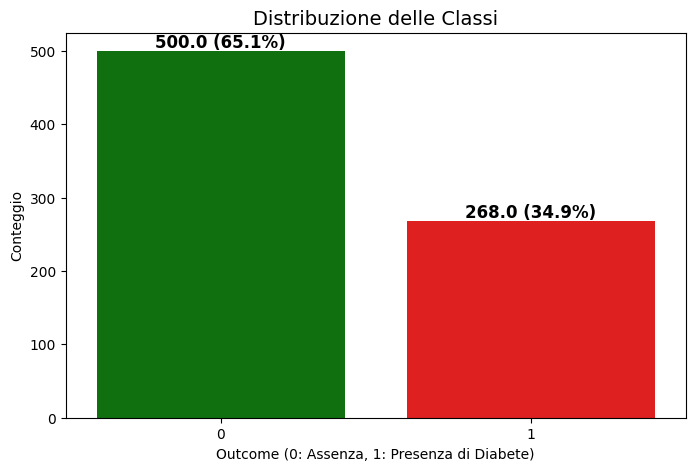

In [295]:
# Creiamo il grafico con conteggio delle classi
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Outcome', data=df, hue='Outcome', palette=['green', 'red'], legend=False)

# Impostiamo titolo e assi
plt.title("Distribuzione delle Classi", size=14)
plt.xlabel("Outcome (0: Assenza, 1: Presenza di Diabete)")
plt.ylabel("Conteggio")

# Calcoliamo il numero totale di esempi
total = len(df)

# Aggiungiamo le etichette con la percentuale sopra ogni barra
for p in ax.patches:
    height = p.get_height()  # Altezza della barra
    if height > 0:
        percentage = '{:.1f}%'.format(100 * height / total)  # Percentuale
        ax.text(p.get_x() + p.get_width()/2., height + 5,  # Posizione del testo
                f'{height} ({percentage})',
                ha="center", fontsize=12, fontweight="bold", color="black")

# Mostriamo il grafico
plt.show()


Interpretazione:
  - Valore 0 (assenza di diabete): si verifica 500 volte nel dataset.
  - Valore 1 (presenza di diabete): si verifica 268 volte nel dataset. \

Dunque, questo mostra che **il dataset non è bilanciato**, perché la classe 0 (assenza di diabete) è molto più numerosa della classe 1 (presenza di diabete). Questa situazione può influenzare negativamente i modelli di machine learning, rendendoli meno efficaci nel predire la classe meno rappresentata.


##### **Dettagli del dataset**


Andando avanti con l'analisi dei dettagli del dataset, possiamo individuare diverse anomalie nei dati, perciò procediamo con:

- `df.describe()` mostra le statistiche principali di ogni feature numerica:
media, deviazione standard, minimo, massimo, quartili (25%, 50%, 75%).
Aiuta a individuare valori anomali (outlier) o distribuzioni non bilanciate.

In [296]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Conclusioni:
- I **valori 0** in Glucose, BloodPressure e BMI sono chiaramente **errori** e vanno sostituiti.
- SkinThickness e Insulin **potrebbero contenere** veri **valori nulli**, ma bisogna verificare più dettagliatamente le colonne.
- Gli altri dati **non mostrano anomalie** evidenti.

Per adesso stabiliamo che i **valori 0** in Glucose, BloodPressure e BMI devono essere trattati come **dati mancanti** e **gestiti nel preprocessing**.

Adesso analizziamo le statistiche per **pazienti SENZA diabete**:

In [297]:
# Statistiche per pazienti SENZA diabete
df_no_diabetes = df[df['Outcome'] == 0]
print("Statistiche per pazienti senza diabete:")
print(df_no_diabetes.describe())

Statistiche per pazienti senza diabete:
       Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      68.184000      19.664000   68.792000   
std       3.017185   26.1412      18.063075      14.889947   98.865289   
min       0.000000    0.0000       0.000000       0.000000    0.000000   
25%       1.000000   93.0000      62.000000       0.000000    0.000000   
50%       2.000000  107.0000      70.000000      21.000000   39.000000   
75%       5.000000  125.0000      78.000000      31.000000  105.000000   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  500.000000                500.000000  500.000000  
mean    30.304200                  0.429734   31.190000  
std      7.689855                  0.299085   11.667655  
min      0.000000                  0.078000   21.000000  
25%

Conclusioni:
- L'insulina media è **anormalmente bassa**:
  - La **media è 0**, il che è altamente **improbabile** per individui sani.
  - Il **25° percentile e il minimo sono 0**, il che suggerisce **errori nei dati**.
  - In un paziente sano, l'insulina a digiuno **non dovrebbe mai essere zero**!

- Molti valori di SkinThickness sono **pari a 0**:
  - Il **minimo è 0** e il **25° percentile è 0**, il che significa che **almeno il 25%** dei pazienti sani ha **SkinThickness = 0**.
  - Questo **è anormale**, poiché lo spessore cutaneo **non dovrebbe mai essere esattamente 0** negli individui sani.

- Altri parametri sembrano coerenti:
  - Glucose indica la media di 109.98, nella norma per non diabetici.
  - BloodPressure indica la media di 68.19, valore realistico.
  - BMI indica la media di 30.30, leggermente sopra la norma (sovrappeso).
  - Age indica la media di 31.19, con un intervallo tra 21 e 81 anni.

Questo significa che **i valori 0** di Insulin e SkinThickness **degli individui sani** devono essere trattati come **dati mancanti** e **gestiti nel preprocessing**.

Adesso analizziamo le statistiche per **pazienti CON diabete**:

In [298]:
# Statistiche per pazienti CON diabete
df_diabetes = df[df['Outcome'] == 1]
print("\nStatistiche per pazienti con diabete:")
print(df_diabetes.describe())


Statistiche per pazienti con diabete:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  268.000000                268.000000  268.000000  
mean    35.142537                  0.550500   37.067164  
std      7.262967                  0.372354   10.968254  
min      0.000000                  0.088000 

Conclusioni:
- Molti valori di Insulin sono 0 per i diabetici:
  - Il **minimo è 0** e il **25° e 50° percentile sono 0**, il che significa che **almeno il 50%** dei pazienti diabetici ha **Insulin = 0**.
  - Questo **è anomalo**, perché nei pazienti diabetici (soprattutto quelli **con diabete di tipo 2**) i livelli di insulina sono generalmente **più alti** a causa dell'insulino-resistenza.
  - Tuttavia, se **la maggior parte dei dati** proviene da pazienti con **diabete di tipo 1**, allora è plausibile, poiché in questi soggetti il pancreas **non produce insulina** o ne **produce quantità minime**.

- Molti valori di SkinThickness sono 0 per i diabetici:
  - Il **minimo è 0** e il **25° percentile è 0**, il che significa che **almeno il 25%** dei pazienti diabetici ha **SkinThickness = 0**.
  - Questo è **potenzialmente un errore** nei dati, perché lo spessore cutaneo **non dovrebbe essere esattamente 0**.
  - Tuttavia, **è possibile** che alcuni pazienti diabetici abbiano effettivamente **un livello di grasso sottocutaneo molto basso**, soprattutto se **soffrono di distrofia lipoatrofica** o **perdita di massa grassa dovuta a diabete scarsamente controllato**.

- Altri parametri sembrano coerenti.

Dunque, scegliemo di **non gestire** i casi di **Insulin = 0** e **SkinThickness = 0** per gli **individui diabetici**.


##### **Statistiche del dataset**


Le statistiche di skewness (asimmetria) e kurtosis (curtosi) ci dicono quali variabili hanno una distribuzione non normale e necessitano di trasformazioni nella fase di preprocessing per migliorare la qualità del modello.

Procediamo con l'analisi della Skewness (Asimmetria):

- `skew()` indica quanto la distribuzione è sbilanciata a destra o a sinistra:
  - **Skewness > 0** significa la distribuzione sbilanciata **a destra** (coda più lunga a destra).
  - **Skewness < 0** significa la distribuzione sbilanciata **a sinistra** (coda più lunga a sinistra).

In [299]:
# Selezioniamo solo le colonne numeriche (escludendo 'Outcome')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calcoliamo la skewness per le feature numeriche
print("Skewness (Asimmetria):")
print(df[numeric_columns].skew())

Skewness (Asimmetria):
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64


Conclusioni:
- Pregnancies e Age sono le variabili più **sbilanciate a destra**, quindi potremmo **applicare trasformazioni logaritmiche o sqrt** per renderle più normali.
- Glucose e BMI hanno una **lieve asimmetria**, quindi sono **quasi normali**.
- BloodPressure, SkinThickness e Insulin sono **quasi simmetriche** e **non necessitano di trasformazioni**.


Andando avanti con l'analisi della Kurtosis (Curtosi):
- `.kurtosis()` indica la forma della distribuzione rispetto alla normale:
  - **Kurtosis > 0** indica la distribuzione leptocurtica (più appuntita, più valori concentrati al centro e più code).
  - **Kurtosis < 0** indica la distribuzione platicurtica (più piatta, meno concentrata al centro).

In [300]:
# Calcoliamo la kurtosis per le feature numeriche
print("\nKurtosis (Curtosi):")
print(df[numeric_columns].kurtosis())


Kurtosis (Curtosi):
Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
dtype: float64


Conclusioni:
- BloodPressure, BMI e Age sono più leptocurtiche (più **concentrate al centro** con code più pronunciate).
- Insulin e DiabetesPedigreeFunction sono molto platicurtiche (distribuzione **molto sparsa e appiattita**).
- SkinThickness e Glucose sono **leggermente** platicurtiche, ma **non in modo estremo**.



Cosa fare nel preprocessing:
- lavorare con le variabili con skewness elevata (fortemente asimmetriche), applicando una trasformazione:
  - Insulin (Skewness = 2.272, Kurtosis = 7.214)
  - DiabetesPedigreeFunction (Skewness = 1.919, Kurtosis = 5.594)

- lavorare con le variabili con kurtosis elevata (leptocurtiche) per controllare e trattare eventuali outlier:
  - BloodPressure (Kurtosis = 5.180) ha code molto lunghe, potrebbe contenere outlier.
  - BMI (Kurtosis = 3.290) ha tendenza leptocurtica, potrebbe contenere outlier.
  - Age (Kurtosis = 0.643) è leggermente leptocurtica, perciò non è necessaria una trasformazione, ma si può normalizzare.

---
---

### **Preprocessing del dataset**

#### **Gestione dei valori mancanti**


  - `columns_to_fix` ontiene un elenco di colonne ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI') dove il valore 0 è considerato un errore o dato mancante.
  - `replace(0, np.nan)` sostituisce tutti i valori 0 con NaN (not a number) nelle colonne specificate.  
  - questo passo **è necessario** perché **un valore 0 non è realistico** in queste variabili (es. pressione sanguigna, glucosio, ecc.).
  - `df.isnull().sum()` conta i valori NaN in ogni colonna, permettendo di verificare quante celle risultano ora vuote dopo la sostituzione.
  - **output atteso** stampa il numero di valori nulli presenti nelle colonne dopo la sostituzione dei valori 0.

In [301]:
# Definiamo le colonne da correggere per TUTTI i pazienti
columns_to_fix = ['Glucose', 'BloodPressure', 'BMI']

# Sostituiamo 0 con NaN nelle colonne critiche
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

# Correggiamo Insulin e SkinThickness SOLO per i pazienti sani (Outcome = 0)
df.loc[df['Outcome'] == 0, 'Insulin'] = df.loc[df['Outcome'] == 0, 'Insulin'].replace(0, np.nan)
df.loc[df['Outcome'] == 0, 'SkinThickness'] = df.loc[df['Outcome'] == 0, 'SkinThickness'].replace(0, np.nan)

# Contiamo i valori nulli dopo la sostituzione
print("Valori nulli dopo aver sostituito 0 con NaN:")
print(df.isnull().sum())

# Contiamo le righe con almeno un valore mancante nelle colonne critiche + Insulin + SkinThickness (solo per sani)
num_righe_con_null = df[columns_to_fix + ['Insulin', 'SkinThickness']].isnull().any(axis=1).sum()

print(f"Numero totale di righe con almeno un valore mancante: {num_righe_con_null}")

Valori nulli dopo aver sostituito 0 con NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               139
Insulin                     236
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Numero totale di righe con almeno un valore mancante: 257


Abbiamo sostituito i valori 0 con NaN solo per:
 - **Glucose**:
  - Il glucosio nel sangue non può essere 0 in una persona viva. Un valore pari a 0 è un errore o un dato mancante.
 - **BloodPressure**:
  - Una pressione sanguigna di 0 mmHg significherebbe assenza di circolazione, quindi è un valore errato.
 - **BMI**:
  - Un BMI pari a 0 è irrealistico (implica un peso nullo), quindi è un errore nei dati.
 - **Insulin (solo per i pazienti sani)**:
  - Nei pazienti sani, un livello di insulina pari a 0 è altamente improbabile, poiché l'insulina è sempre presente nel sangue, anche in concentrazioni minime.
  - È probabile che i valori 0 rappresentino misurazioni mancanti e siano stati registrati erroneamente.
  - Per i pazienti diabetici, invece, 0 potrebbe essere un valore clinicamente plausibile in caso di diabete di tipo 1.
 - **SkinThickness (solo per i pazienti sani)**:
  - Lo spessore cutaneo non dovrebbe mai essere 0, a meno che non sia una misurazione non effettuata e registrata erroneamente.
  - Alcuni pazienti sani potrebbero avere livelli di grasso sottocutaneo molto bassi, ma 0 è poco realistico.
  - Per questo motivo, i valori 0 sono stati trattati come dati mancanti e saranno imputati nel preprocessing.


Una volta gestita la scelta delle colonne, si procede con l'imputazione dei valori mancanti (NaN) utilizzando un metodo avanzato, `IterativeImputer`, e verifica che tutti i valori mancanti siano stati gestiti.
  - IterativeImputer:
    - si tratta di un'imputazione avanzata in cui i valori mancanti vengono stimati in base ai valori delle altre feature nel dataset.
    - l'imputer utilizza un algoritmo iterativo per stimare i valori mancanti di ciascuna feature come una funzione lineare delle altre feature.
    - parametri utilizzati sono `max_iter=10` (specifica il numero massimo di iterazioni per stimare i valori) e `random_state=42` (garantisce la riproducibilità dei risultati).

  - Imputazione dei valori mancanti:
    - `fit_transform()` calcola i valori stimati per i NaN in base alle altre feature e li sostituisce nei dati originali.
    - i valori mancanti nelle colonne specificate in `columns_to_fix` vengono quindi riempiti con i valori stimati.

  - Controllo post-imputazione:
    - `df.isnull().sum()` conta i valori mancanti in ogni colonna dopo l'imputazione per assicurarsi che tutte le celle siano state correttamente riempite.
    - **output atteso** stampa del conteggio dei valori nulli dopo l'imputazione (sovrebbe risultare 0 valori nulli per tutte le colonne in columns_to_fix, indicando che tutti i valori mancanti sono stati sostituiti con stime).

In [302]:
# Creiamo un IterativeImputer con limiti sui valori minimi
imputer = IterativeImputer(max_iter=10, random_state=42, min_value=0)  # min_value=0 impedisce valori negativi

# Applichiamo l'imputazione su tutte le colonne modificate
df[columns_to_fix + ['Insulin', 'SkinThickness']] = imputer.fit_transform(df[columns_to_fix + ['Insulin', 'SkinThickness']])

# Controllo post-imputazione
print("Valori nulli dopo IterativeImputer:")
print(df.isnull().sum())

Valori nulli dopo IterativeImputer:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Successivamente, verifichiamo di nuovo i dettagli del dataset per controllare che IterativeImputer abbia modificato correttamente i dati:

In [303]:
# Statistiche per pazienti sia SENZA diabete che CON diabete
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.612547,72.434965,24.611359,109.476318,32.435347,0.471876,33.240885
std,3.369578,30.453089,12.150487,12.921637,104.379368,6.880494,0.331329,11.760232
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,18.000000,50.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,25.000000,92.000000,32.021014,0.372500,29.000000
75%,6.000000,140.250000,80.000000,33.000000,140.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [304]:
# Statistiche per pazienti SENZA diabete
df_no_diabetes = df[df['Outcome'] == 0]
print("Statistiche per pazienti senza diabete:")
print(df_no_diabetes.describe())

Statistiche per pazienti senza diabete:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.000000     500.000000     500.000000  500.000000   
mean      3.298000  110.644242      70.814448      25.923047  114.375625   
std       3.017185   24.705049      11.942228       9.189934   79.910456   
min       0.000000   44.000000      24.000000       7.000000    1.902988   
25%       1.000000   93.000000      63.500000      19.000000   69.740667   
50%       2.000000  107.000000      70.000000      25.000000   95.045366   
75%       5.000000  125.000000      78.000000      31.250000  132.002979   
max      13.000000  197.000000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  500.000000                500.000000  500.000000  
mean    30.868812                  0.429734   31.190000  
std      6.503771                  0.299085   11.667655  
min     18.200000                  0.078000

In [305]:
# Statistiche per pazienti CON diabete
df_diabetes = df[df['Outcome'] == 1]
print("\nStatistiche per pazienti con diabete:")
print(df_diabetes.describe())


Statistiche per pazienti con diabete:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  142.075803      75.458318      22.164179  100.335821   
std       3.741239   29.627764      11.977978      17.679711  138.689125   
min       0.000000   78.000000      30.000000       0.000000    0.000000   
25%       1.750000  119.000000      68.000000       0.000000    0.000000   
50%       4.000000  140.000000      75.880097      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  268.000000                268.000000  268.000000  
mean    35.357987                  0.550500   37.067164  
std      6.616077                  0.372354   10.968254  
min     22.900000                  0.088000 

#### **Gestione degli outlier**


 Questo pezzo di codice applica un PowerTransformer per trasformare le variabili asimmetriche (con distribuzioni non normali) in distribuzioni più vicine a una normale (gaussiane). Questo passaggio è utile per migliorare le prestazioni di molti algoritmi di machine learning che assumono dati con distribuzioni normali.

 Tuttavia, prima di applicare la trasformazione, mettiamo un'esempio delle distribuzioni delle variabili Insulin e DiabetesPedigreeFunction che mostrano una forte asimmetria:

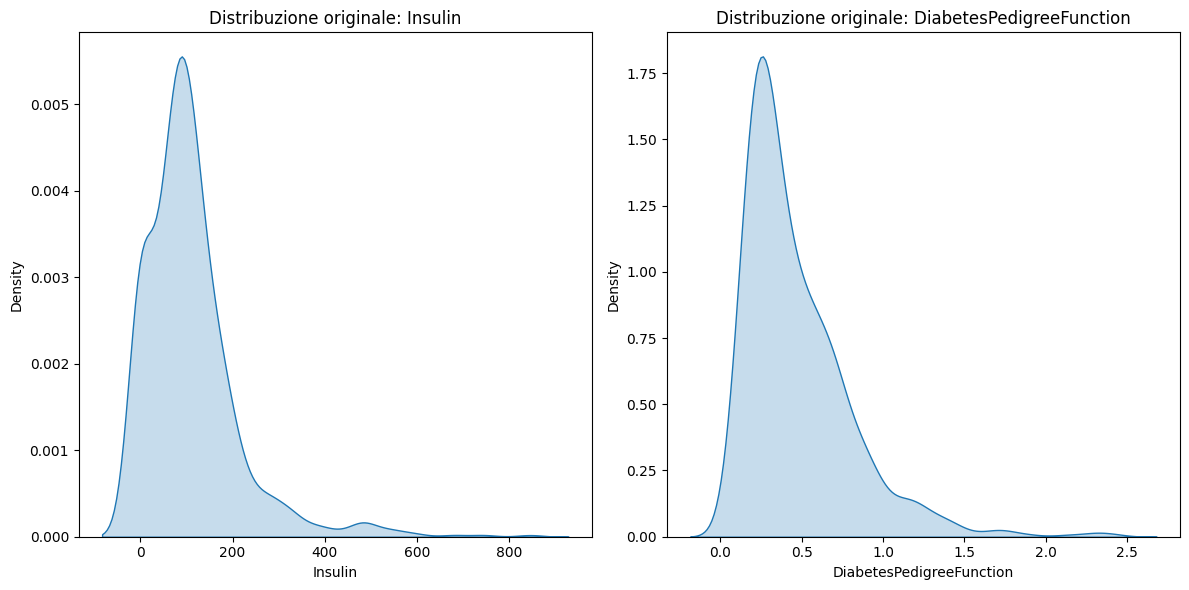

In [306]:
# Visualizzazione delle distribuzioni originali (prima della trasformazione)
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Insulin', 'DiabetesPedigreeFunction']):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f"Distribuzione originale: {col}")
plt.tight_layout()
plt.show()

Adesso applichiamo la trasformazione:
  - `PowerTransformer()`:
    - è uno strumento di preprocessing di scikit-learn che applica trasformazioni non lineari.
    - serve per stabilizzare la varianza, rendere la distribuzione dei dati più simmetrica, migliorare le prestazioni degli algoritmi sensibili alla distribuzione dei dati, come la regressione lineare o i modelli basati su distanza (es. SVM).
  - `fit_transform()`:
    - calcola i parametri della trasformazione in base ai dati forniti, poi applica la trasformazione ai dati.
    - di default utilizza il metodo Yeo-Johnson, che supporta dati sia positivi che negativi (al contrario del Box-Cox che funziona solo con valori positivi).

In [307]:
# Applicazione di PowerTransformer per variabili asimmetriche
power_transformer = PowerTransformer()
df[['Insulin', 'DiabetesPedigreeFunction']] = power_transformer.fit_transform(df[['Insulin', 'DiabetesPedigreeFunction']])

Infatti, dopo l'applicazione del `PowerTransformer` si vede che la distribuzione si è stabilizzata:
- Insulin:
    - la distribuzione si avvicina a una forma simmetrica e centrata, migliorando la normalità.
- DiabetesPedigreeFunction:
    - anche questa distribuzione diventa più simmetrica e più vicina a una distribuzione normale.


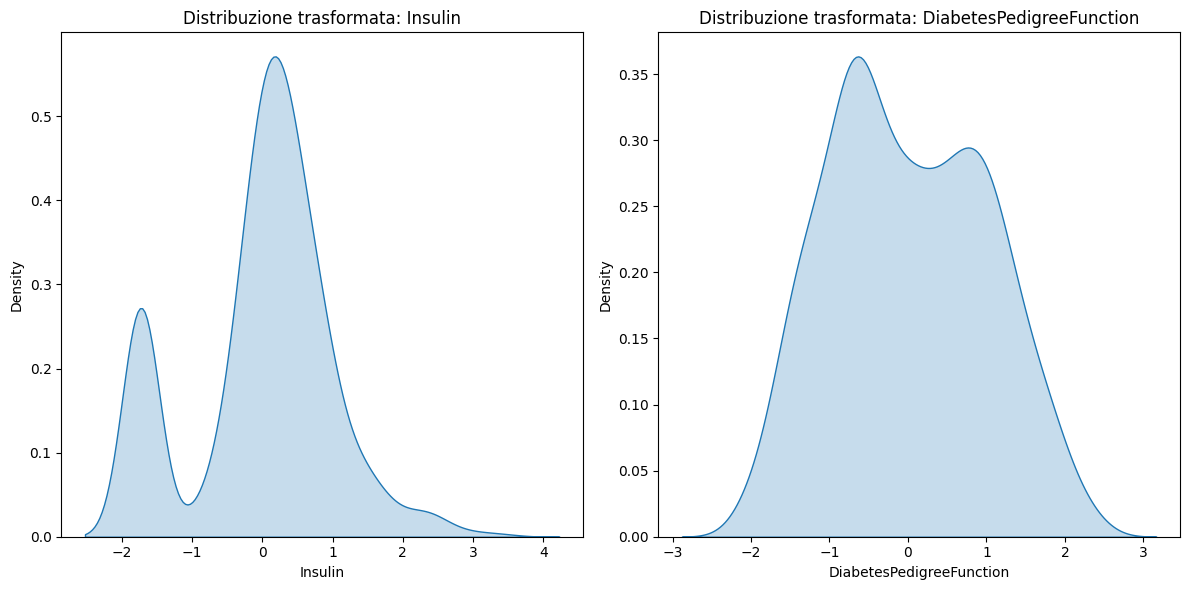

In [308]:
# Visualizzazione delle distribuzioni trasformate (dopo PowerTransformer)
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Insulin', 'DiabetesPedigreeFunction']):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f"Distribuzione trasformata: {col}")
plt.tight_layout()
plt.show()

Questa trasformazione implica:
1. Rimozione dell'asimmetria:
  - algoritmi come la regressione lineare, le reti neurali o i modelli basati su distanze funzionano meglio con dati normalizzati.

2. Stabilità numerica:
  - valori estremi vengono ridotti, diminuendo il rischio di influenze sproporzionate da outlier.

3. Miglioramento dell'accuratezza del modello:
  - molti modelli producono risultati più stabili e interpretabili con dati normalizzati.

Adesso proviamo di individuare outlier con boxplot per le variabili di BloodPressure, BMI (Kurtosis = 3.290) e Age (Kurtosis = 0.643):

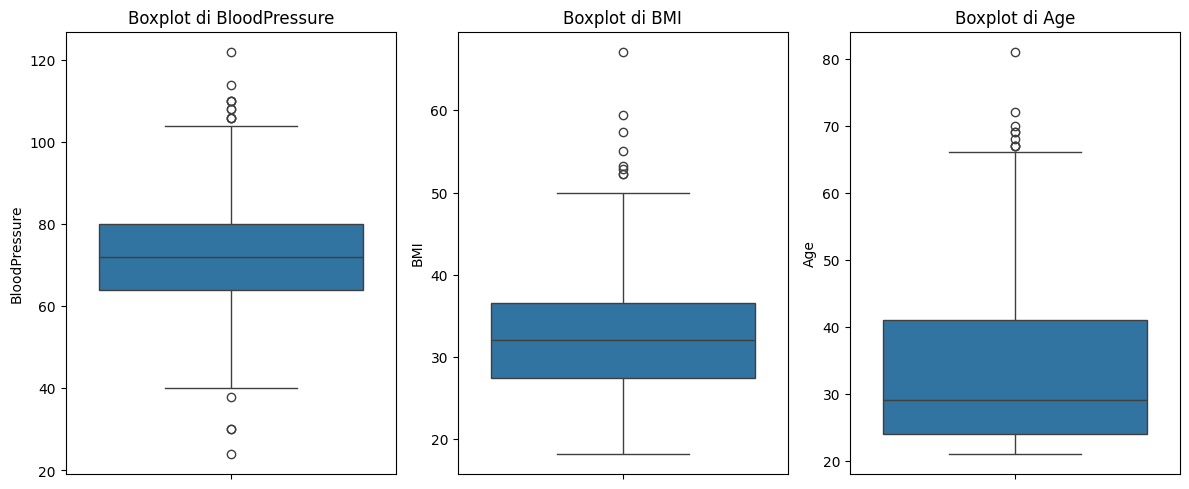

In [309]:
# Creazione boxplot per individuare gli outlier
plt.figure(figsize=(12, 5))
columns_to_check = ['BloodPressure', 'BMI', 'Age']
for i, col in enumerate(columns_to_check):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot di {col}')

plt.tight_layout()
plt.show()

Osservazioni:
- BloodPressure:
  - Ci sono alcuni outlier nella parte inferiore (valori inferiori a 40 mmHg).
  - La maggior parte dei valori si concentra tra 60 e 80 mmHg, con una distribuzione abbastanza concentrata.
  - I valori estremamente bassi potrebbero rappresentare **errori di inserimento** o **casi rari** (es. ipotensione grave)..

- BMI:
  - Ci sono outlier nella parte superiore (valori sopra 50).
  - La maggior parte dei valori è concentrata tra 25 e 40, che è comune in un dataset che include pazienti diabetici (sovrappeso o obesi).
  - I valori molto alti (> 50) potrebbero rappresentare **errori di inserimento** o **casi rari**.

- Age:
  - Gli outlier sono nella parte superiore, con alcuni valori sopra i 70 anni.
  - La maggior parte dei valori è distribuita tra 20 e 50 anni, che è tipico di un dataset clinico.
  - **Non è necessario rimuovere gli outlier** se sono plausibili, poiché un'età elevata è coerente con il rischio di diabete.

Quindi, procediamo con:
- Calcolo dell'IQR (Interquartile Range):
  - L'IQR misura la dispersione dei dati tra il 25° e il 75° percentile, che rappresenta il range intermedio della distribuzione.
- Identificazione degli outlier:
  - I valori al di sotto di `Q1 - 1.5 * IQR` o al di sopra di `Q3 + 1.5 * IQR` sono considerati anomalie (outlier).
- Filtraggio del dataset:
  - Vengono mantenuti solo i valori che rientrano nel range accettabile.
  - Gli outlier vengono rimossi dal dataset, lasciando solo i valori compresi tra i limiti calcolati.


In [310]:
# Lista delle colonne da trattare
columns_to_fix = ['BloodPressure', 'BMI']

for col in columns_to_fix:
    # Calcolo IQR per ogni colonna
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Rimuoviamo gli outlier per la colonna corrente
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


Adesso possiamo verificare cosa è stato effettivamente cambiato:

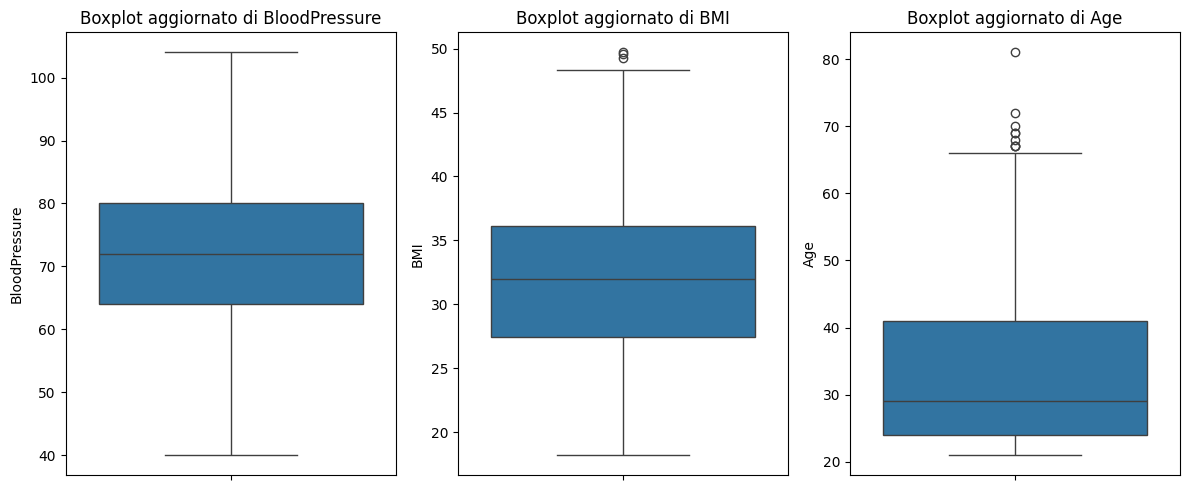

In [311]:
# Creazione boxplot aggiornati
plt.figure(figsize=(12, 5))
columns_to_check = ['BloodPressure', 'BMI', 'Age']
for i, col in enumerate(columns_to_check):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot aggiornato di {col}')

plt.tight_layout()
plt.show()

Conclusione:
- BloodPressure e BMI:
  - Gli outlier sono stati trattati correttamente e le distribuzioni ora appaiono più pulite e rappresentative.

- Age:
  - Gli outlier plausibili sono stati mantenuti e la distribuzione non è stata alterata.

#### **Standardizzazione delle feature**


  Questo pezzo di codice esegue la standardizzazione delle feature, un passaggio fondamentale del preprocessing per i modelli di machine learning.
  Tuttavia, prima di applicare la standardizzazione, mettiamo un'esempio delle distribuzioni attuali:


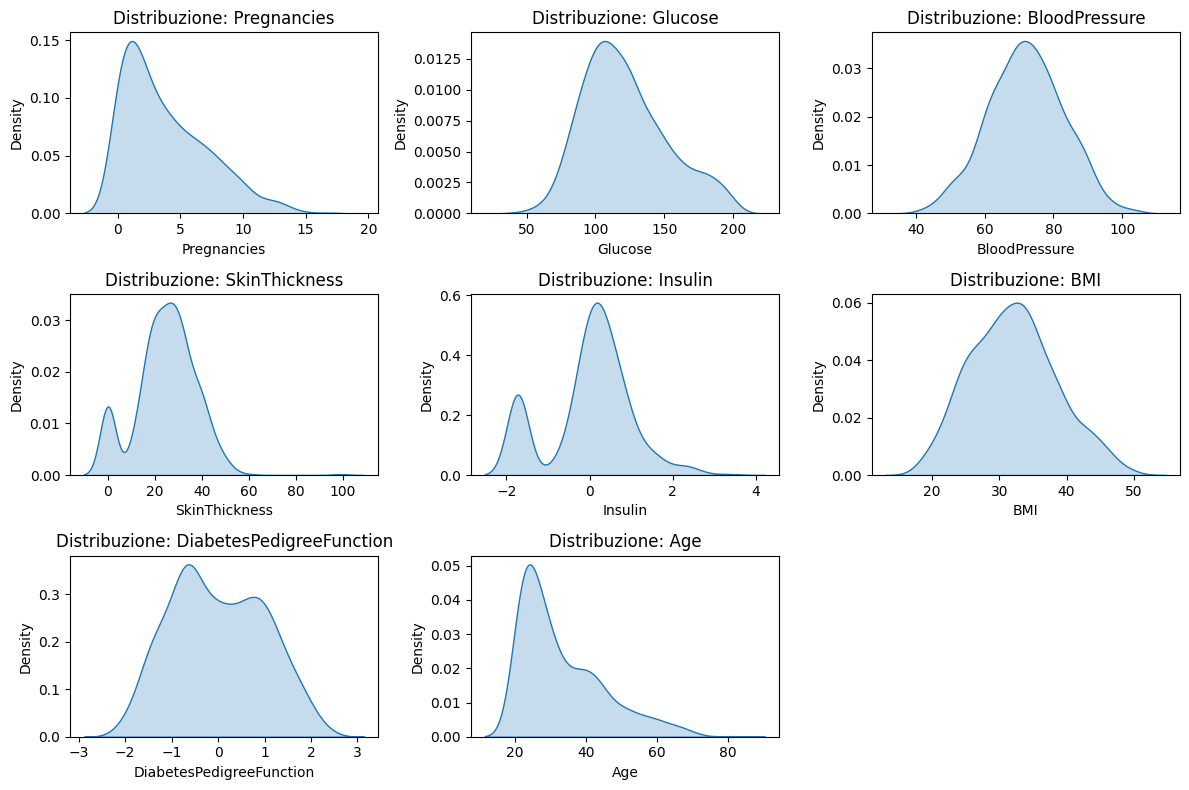

In [312]:
# Escludiamo solo il target, mantenendo tutte le feature originali
X_original = df.drop(columns=["Outcome"])

# Calcolo dinamico delle righe necessarie per la disposizione dei subplot
n_cols = 3  # Numero di colonne nei subplot
n_rows = int(np.ceil(len(X_original.columns) / n_cols))  # Calcolo del numero di righe necessario

# Visualizzazione delle distribuzioni delle feature originali
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_original.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=X_original, x=col, fill=True)
    plt.title(f"Distribuzione: {col}")

plt.tight_layout()
plt.show()

Adesso applichiamo la standardizzazione e vediamo cosa succede nel dettaglio:
  - `StandardScaler` trasforma i dati in modo che ogni feature abbia **media 0** e **deviazione standard 1**.
  - `X = df.drop(columns=["Outcome"])` esclude la variabile target (Outcome) dal dataset, poiché questa non deve essere standardizzata (è il valore da prevedere, non da trasformare).
  - `fit_transform(X)` calcola la media e la deviazione standard di ciascuna colonna nel dataset X, poi utilizza questi parametri per trasformare ogni valore di ciascuna feature secondo la formula della standardizzazione.
  - output atteso è un array numpy in cui tutte le feature sono standardizzate (media 0 e deviazione standard 1).

E' importante standardizzare le feature, perchè le feature nel dataset spesso hanno scale diverse (es. Glucose varia da 50 a 200, mentre Age varia da 20 a 80). Standardizzare elimina il problema delle scale diverse.
  
Tra altro, esistono anche modelli sensibili alla scala, come SVM, k-NN, regressione logistica, reti neurali e ecc. Questi algoritmi calcolano distanze o ottimizzano con gradienti e richiedono che le feature abbiano valori comparabili.

In [313]:
# Standardizzazione di tutte le feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

Dopo aver applicato la standardizzazione con StandardScaler, che centra i dati a una media di 0 e una deviazione standard di 1, il codice visualizza le distribuzioni delle feature standardizzate.

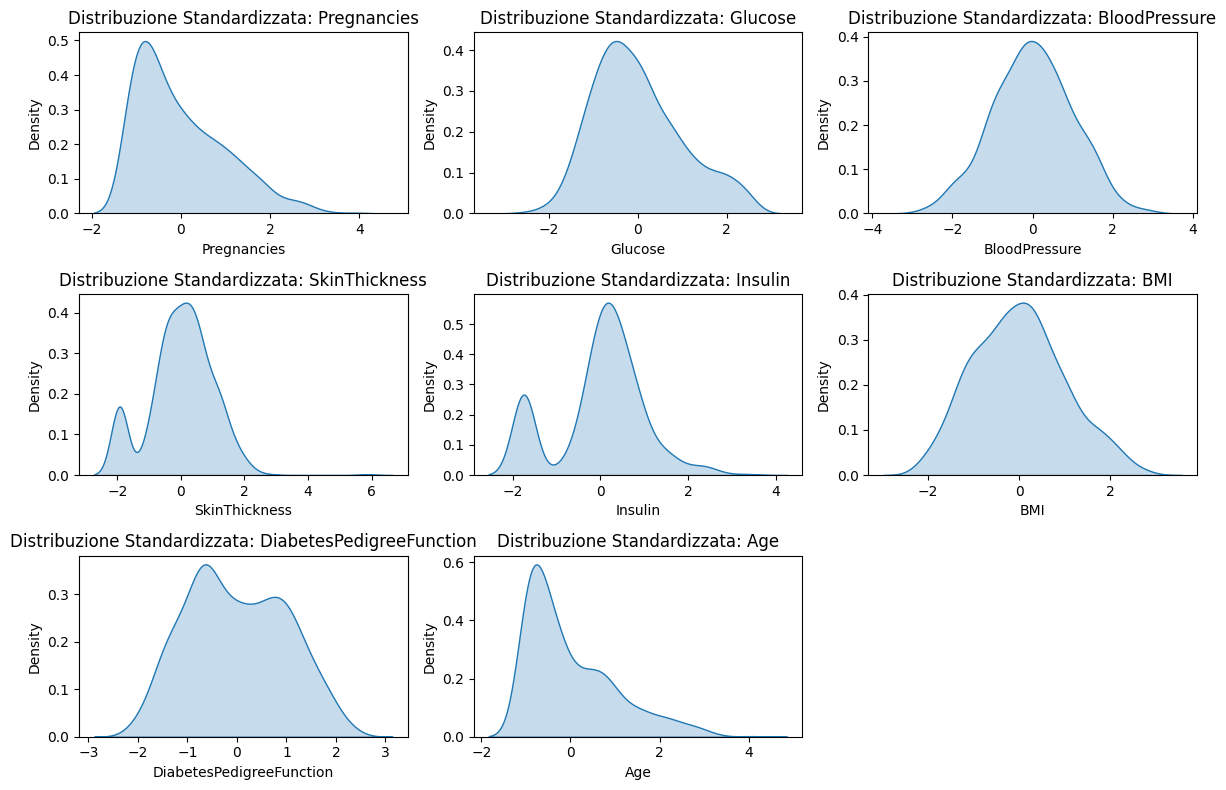

In [314]:
# Creiamo un nuovo DataFrame standardizzato solo con le feature originali
X_scaled_df = pd.DataFrame(X_scaled, columns=X_original.columns)

# Calcolo dinamico delle righe necessarie per la visualizzazione
n_cols = 3  # Numero di colonne nei subplot
n_rows = int(np.ceil(len(X_scaled_df.columns) / n_cols))  # Calcola il numero di righe necessarie

# Visualizzazione delle distribuzioni standardizzate delle feature originali
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_scaled_df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=X_scaled_df, x=col, fill=True)
    plt.title(f"Distribuzione Standardizzata: {col}")

plt.tight_layout()
plt.show()

Dai grafici si vede come le distribuzioni siano state ridimensionate e centrate, garantendo che tutte le variabili siano sulla stessa scala, essenziale per il corretto funzionamento di molti algoritmi di machine learning.

#### **Bilanciamento del dataset con SMOTE**


Questo pezzo di codice applica una tecnica per bilanciare i dataset sbilanciati.
- genera campioni sintetici per la classe minoritaria (nel nostro caso, Outcome=1, ovvero i pazienti diabetici) anziché duplicare semplicemente i dati esistenti.
- questo approccio aiuta a evitare problemi di overfitting che possono verificarsi quando si duplicano i dati reali.

In [315]:
# Creazione del target y
y = df["Outcome"]

# Controlliamo che X_scaled_df e y abbiano le stesse dimensioni
print(f"Dimensioni di X_scaled_df: {X_scaled_df.shape}")
print(f"Dimensioni di y: {y.shape}")

# Applicazione di SMOTE per bilanciare il dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

# Controlliamo la nuova distribuzione delle classi dopo SMOTE
print("Distribuzione delle classi dopo SMOTE:")
print(y_resampled.value_counts())


Dimensioni di X_scaled_df: (747, 8)
Dimensioni di y: (747,)
Distribuzione delle classi dopo SMOTE:
Outcome
0    490
1    490
Name: count, dtype: int64


Una volta abbiamo utilizzato la funziona SMOTE, procediamo con:
* `y_resampled.value_counts()` restituisce il conteggio di ogni valore unico presente nella colonna `Outcome` del DataFrame Pandas. Questo è utile per verificare la distribuzione delle classi nel dataset e **determinare se è bilanciato o meno**.
  - colonna `Outcome` del DataFrame rappresenta l'etichetta target, dove `1` indica la presenza di diabete, mentre `0` indica l'assenza di diabete.
  - `.value_counts()` conta il numero di occorrenze di ciascun valore unico presente nella colonna.


In [316]:
y_resampled.value_counts()

,count
Outcome,
0,490
1,490


Interpretazione:
  - Valore 0 (assenza di diabete): si verifica 500 volte nel dataset.
  - Valore 1 (presenza di diabete): si verifica 500 volte nel dataset. \

Dunque, questo mostra che il dataset è bilanciato, perché la classe 0 (assenza di diabete) ha lo stesso numero di casi della classe 1 (presenza di diabete).

* sns.countplot(x='Outcome', data=df):
  - si usa **seaborn**, una libreria per la visualizzazione dei dati, per creare un grafico a barre che conta la frequenza di ciascun valore nella colonna `Outcome`.
  - `x='Outcome'` specifica che i valori della colonna `Outcome` saranno visualizzati sull'asse x.
  - `data=df` specifica che i dati sono contenuti nel DataFrame `df`.

In altre parole, questo blocco di codice è usato per visualizzare graficamente la distribuzione delle classi nella colonna `Outcome` del dataset. Questa distribuzione rappresenta il bilanciamento tra i valori target, ossia `0` (assenza di diabete) e `1` (presenza di diabete).

<ipython-input-317-75cfb2684444>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', data=y_resampled_df, palette=['green', 'red'])


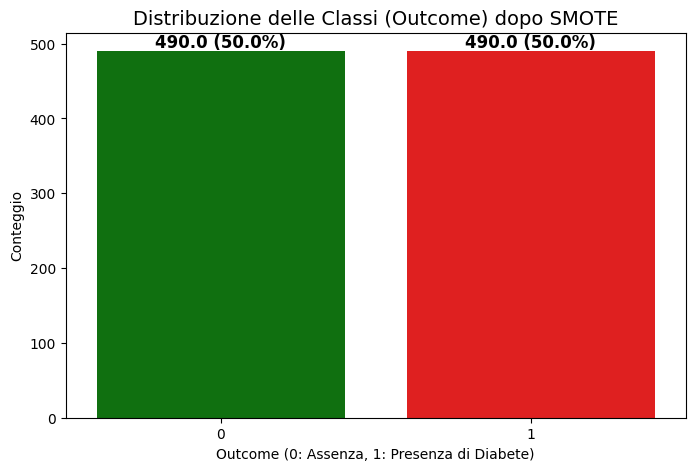

In [317]:
# Convertiamo y_resampled in un DataFrame per compatibilità con seaborn
y_resampled_df = pd.DataFrame({'Outcome': y_resampled})

# Creiamo il grafico con conteggio delle classi
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Outcome', data=y_resampled_df, palette=['green', 'red'])

# Impostiamo titolo e assi
plt.title("Distribuzione delle Classi (Outcome) dopo SMOTE", size=14)
plt.xlabel("Outcome (0: Assenza, 1: Presenza di Diabete)")
plt.ylabel("Conteggio")

# Calcoliamo il numero totale di esempi dopo SMOTE
total = len(y_resampled_df)

# Aggiungiamo le etichette con la percentuale sopra ogni barra
for p in ax.patches:
    height = p.get_height()  # Altezza della barra
    if height > 0:
        percentage = '{:.1f}%'.format(100 * height / total)  # Percentuale
        ax.text(p.get_x() + p.get_width()/2., height + 5,  # Posizione del testo
                f'{height} ({percentage})',
                ha="center", fontsize=12, fontweight="bold", color="black")

# Mostriamo il grafico
plt.show()

---
---

### **Istogrammi, grafici e matrice di correlazione**

#### **Istogrammi**

Questo pezzo di codice genera istogrammi per visualizzare la distribuzione di tutte le variabili numeriche nel dataset, escludendo la colonna Outcome:

- `.hist()` genera istogrammi per tutte le colonne numeriche rimanenti.

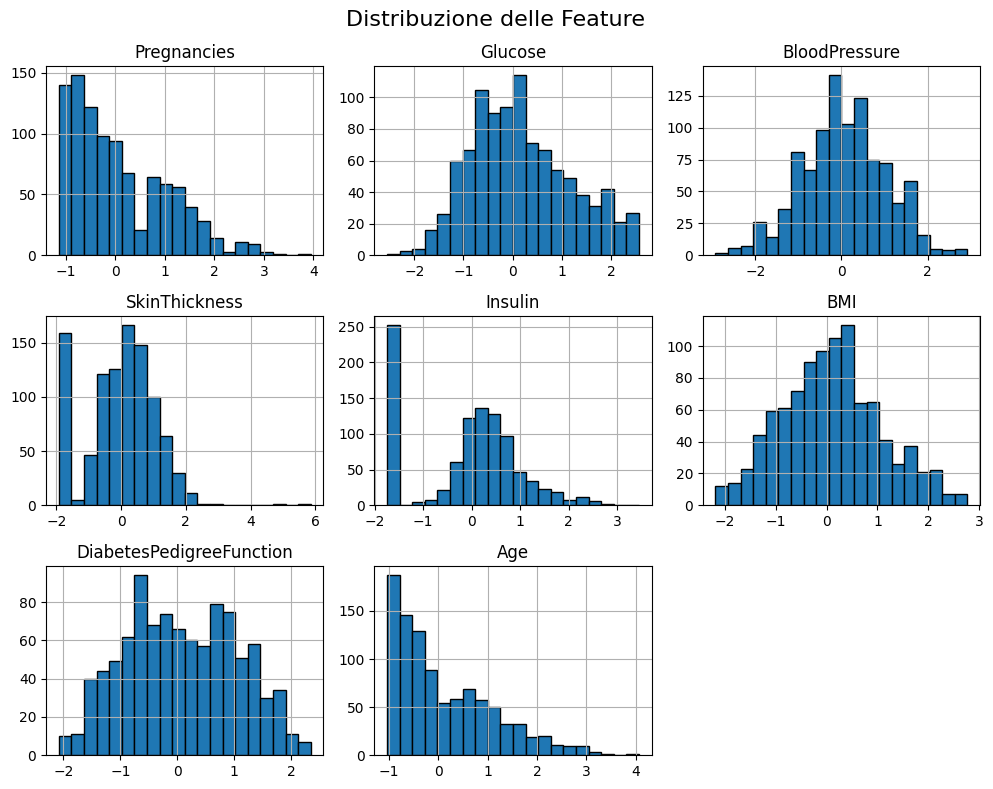

In [318]:
# Creiamo un DataFrame con solo le feature originali dopo preprocessing
X_resampled_original = pd.DataFrame(X_resampled, columns=X_original.columns)

# Istogrammi delle feature originali dopo preprocessing
X_resampled_original.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribuzione delle Feature', fontsize=16)
plt.tight_layout()
plt.show()

#### **Grafici**

Questo pezzo di codice crea dei grafici di densità (KDE - Kernel Density Estimation) per ogni feature del dataset. I grafici mostrano la distribuzione probabilistica delle variabili, aiutando a visualizzare la forma dei dati e la loro variazione.

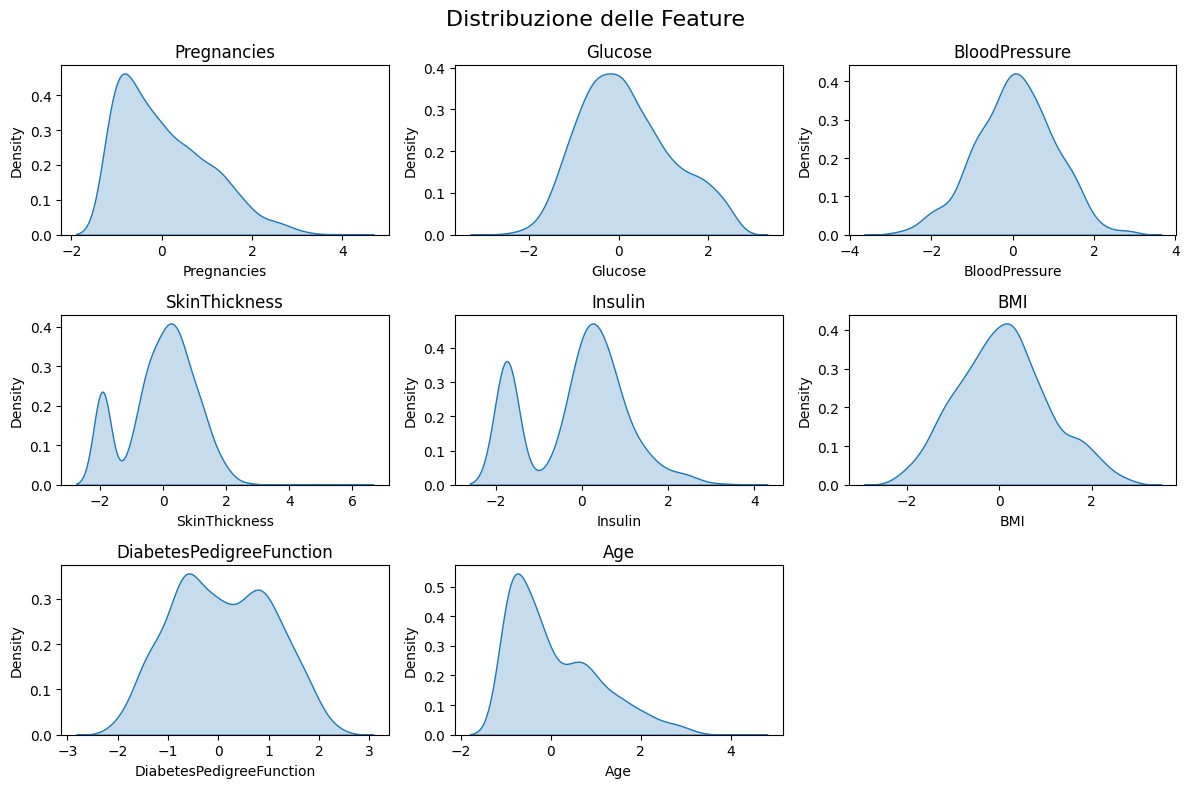

In [319]:
# KDE per il dataset con solo le feature originali dopo preprocessing con più spazio tra i grafici
plt.figure(figsize=(12, 8))

for i, col in enumerate(X_resampled_original.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=X_resampled_original, x=col, fill=True)
    plt.title(col)

plt.suptitle('Distribuzione delle Feature', fontsize=16)
plt.tight_layout()
plt.show()

#### **Matrice di correlazione**

Questo pezzo di codice visualizza una matrice di correlazione tra le feature numeriche nel dataset, rappresentata visivamente come una heatmap:
- ogni cella rappresenta la correlazione tra due variabili.
- colori diversi indicano l'intensità della correlazione.

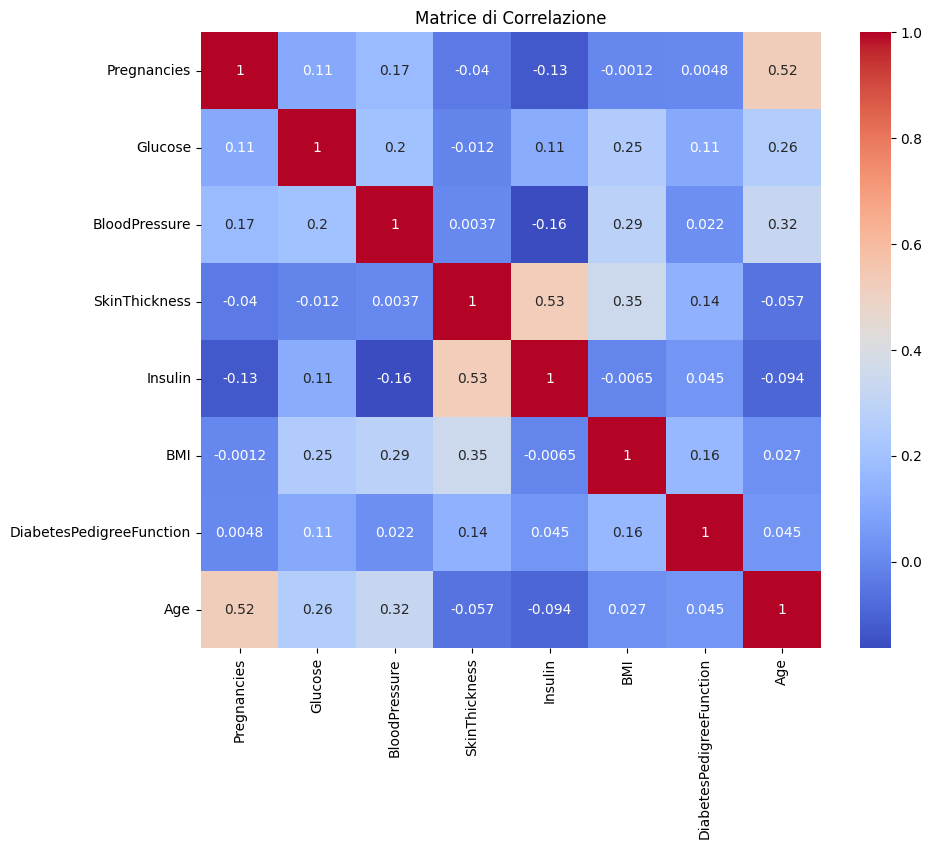

In [320]:
# Matrice di correlazione con le feature originali
plt.figure(figsize=(10, 8))
sns.heatmap(X_resampled_original.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

Osservazioni generali:
1. Colore e valore della correlazione:
  - **blu scuro** indica correlazioni **deboli** o **negative**.
  - **rosso** più intenso indica correlazioni **forti** e **positive**.
  - valori **vicini a 1 o -1** indicano una correlazione **forte**.
  - valori **vicini a 0** indicano una correlazione **debole** o **assente**.

2. La diagonale principale (valore 1):
  - rappresenta la correlazione di ogni variabile **con se stessa** (sempre 1).


---
---

### **Modelli di classificazione**

#### **Divisione del dataset in Training e Test Set**

Una volta finita la fase di preprocessing, è necessario dividere i dati in **training set** e **test set** per addestrare e valutare i modelli di Machine Learning.

Utilizziamo la funzione `train_test_split()` di **scikit-learn** per suddividere il dataset in due diverse proporzioni:
- 70% Training – 30% Test:
  - Questo set viene usato per addestrare il modello con una quantità maggiore di dati, mantenendo comunque una porzione significativa per il test.
- 80% Training – 20% Test:
  - In questo caso, il modello viene addestrato con ancora più dati, lasciando meno spazio alla valutazione. Questo può essere utile quando si vuole massimizzare l'apprendimento del modello.

In [321]:
# Divisione Training e Test set (70% Training, 30% Test)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Dimensioni dei dataset dopo SMOTE:")
print(f"Train Set 1: {x_train.shape}, Test Set: {x_test.shape}")

# Divisione Training e Test set (80% Training, 20% Test)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Dimensioni dei dataset dopo SMOTE:")
print(f"Train Set 2: {x_train2.shape}, Test Set: {x_test2.shape}")

Dimensioni dei dataset dopo SMOTE:
Train Set 1: (686, 8), Test Set: (294, 8)
Dimensioni dei dataset dopo SMOTE:
Train Set 2: (784, 8), Test Set: (196, 8)


#### **Decision Tree Classifier**


In [322]:
# Decision Tree Classifier 1
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

# Decision Tree Classifier 2
dt_model2 = DecisionTreeClassifier(random_state=42)
dt_model2.fit(x_train2, y_train2)
y_pred_dt2 = dt_model2.predict(x_test2)

In [323]:
# Decision Tree Evaluation 1
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)


# Decision Tree Evaluation 2
accuracy_dt2 = accuracy_score(y_test2, y_pred_dt2)
precision_dt2 = precision_score(y_test2, y_pred_dt2)
recall_dt2 = recall_score(y_test2, y_pred_dt2)
f1_dt2 = f1_score(y_test2, y_pred_dt2)
cm_dt2 = confusion_matrix(y_test2, y_pred_dt2)

Decision Tree Classifier 1:
 Accuracy: 0.8775510204081632
 Precision: 0.8466666666666667
 Recall: 0.9071428571428571
 F1 Score: 0.8758620689655172


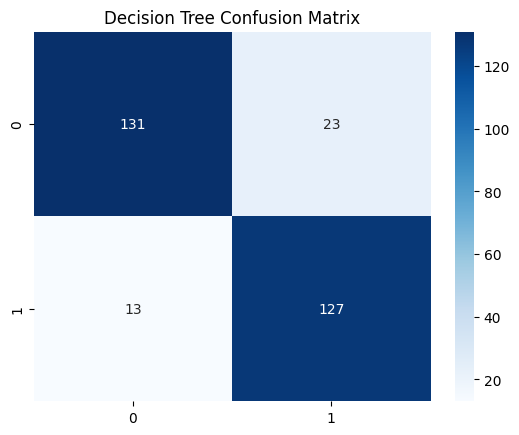

Decision Tree Classifier 2:
 Accuracy: 0.8673469387755102
 Precision: 0.8461538461538461
 Recall: 0.8651685393258427
 F1 Score: 0.8555555555555555


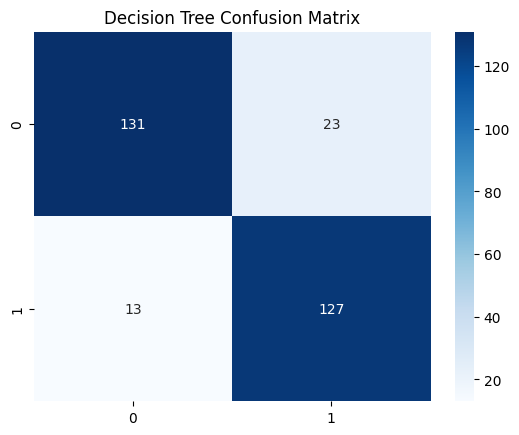

In [324]:
print(f'Decision Tree Classifier 1:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

print(f'Decision Tree Classifier 2:\n Accuracy: {accuracy_dt2}\n Precision: {precision_dt2}\n Recall: {recall_dt2}\n F1 Score: {f1_dt2}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

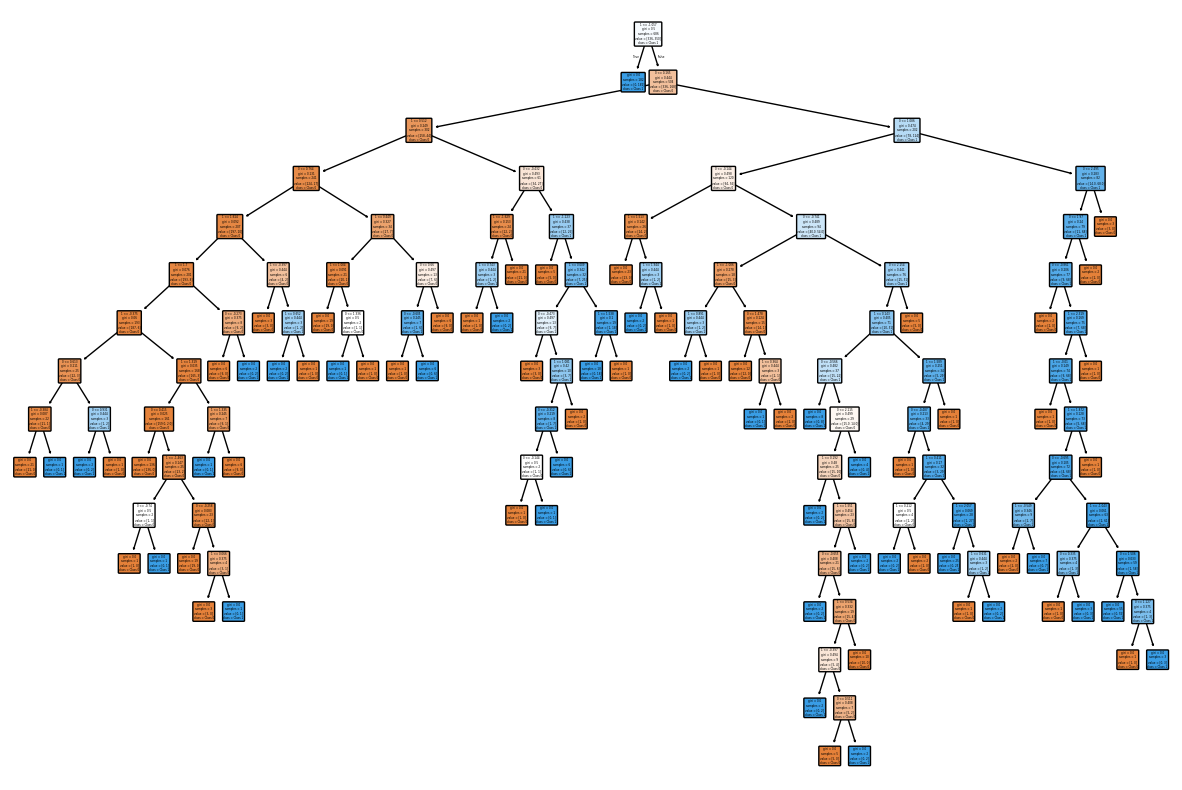

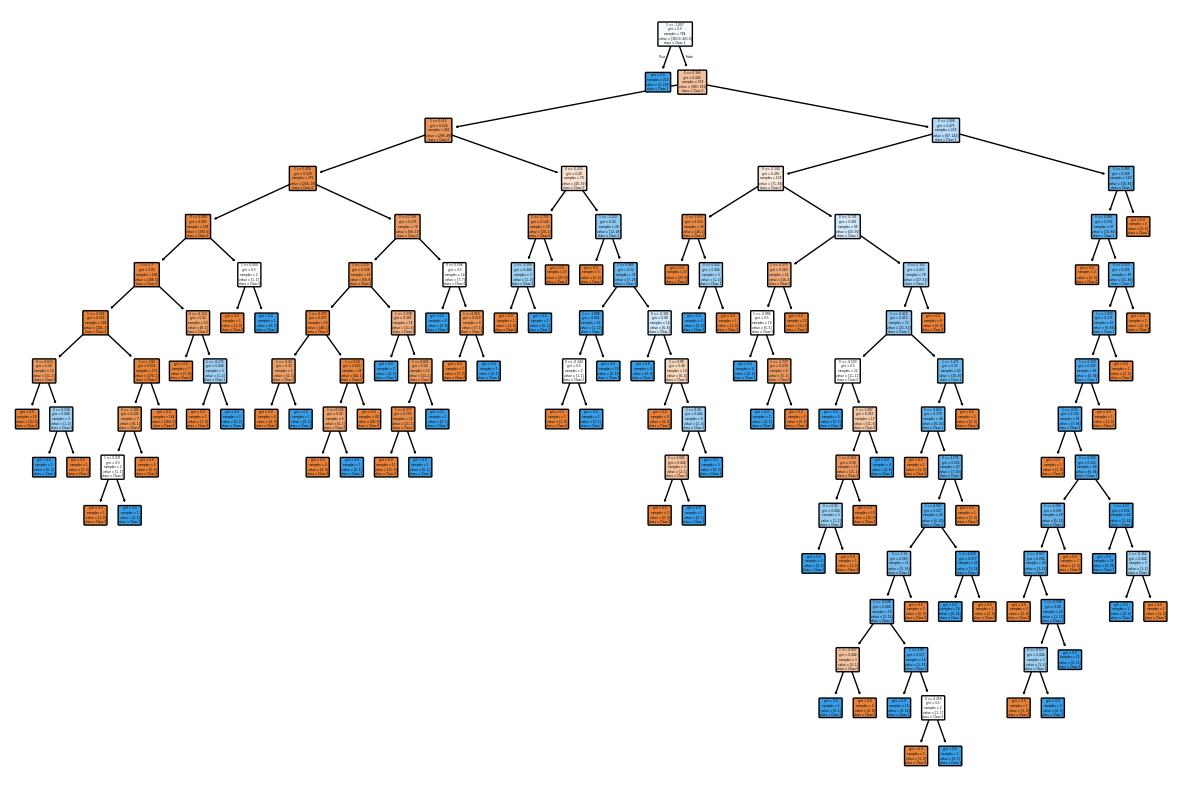

In [325]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
plt.show()

plt.figure(figsize=(15, 10))
plot_tree(dt_model2, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
plt.show()

#### Logistic Regression

In [326]:
# Logistic Regression 1
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# Logistic Regression 1
lr_model2 = LogisticRegression(random_state=42)
lr_model2.fit(x_train2, y_train2)
y_pred_lr2 = lr_model2.predict(x_test2)

In [327]:
# Logistic regression Evaluation 1
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Logistic regression Evaluation 1
accuracy_lr2 = accuracy_score(y_test2, y_pred_lr2)
precision_lr2 = precision_score(y_test2, y_pred_lr2)
recall_lr2 = recall_score(y_test2, y_pred_lr2)
f1_lr2 = f1_score(y_test2, y_pred_lr2)
cm_lr2 = confusion_matrix(y_test2, y_pred_lr2)

Logistic Regression 1:
 Accuracy: 0.8401360544217688
 Precision: 0.8345323741007195
 Recall: 0.8285714285714286
 F1 Score: 0.8315412186379928


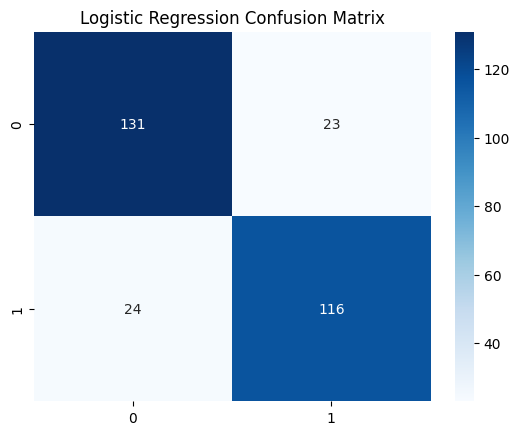

Logistic Regression 2:
 Accuracy: 0.8214285714285714
 Precision: 0.7934782608695652
 Recall: 0.8202247191011236
 F1 Score: 0.8066298342541437


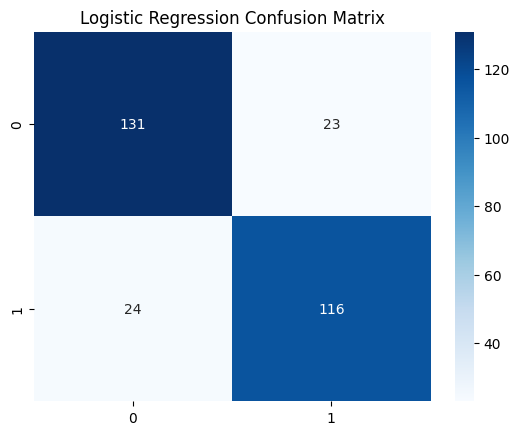

In [328]:
print(f'Logistic Regression 1:\n Accuracy: {accuracy_lr}\n Precision: {precision_lr}\n Recall: {recall_lr}\n F1 Score: {f1_lr}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

print(f'Logistic Regression 2:\n Accuracy: {accuracy_lr2}\n Precision: {precision_lr2}\n Recall: {recall_lr2}\n F1 Score: {f1_lr2}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#### Support Vector Machine

In [329]:
# Support Vector Machine 1
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

# Support Vector Machine 2
svm_model2 = SVC(random_state=42)
svm_model2.fit(x_train2, y_train2)
y_pred_svm2 = svm_model2.predict(x_test2)

In [330]:
# SVM Evaluation 1
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# SVM Evaluation 2
accuracy_svm2 = accuracy_score(y_test2, y_pred_svm2)
precision_svm2 = precision_score(y_test2, y_pred_svm2)
recall_svm2 = recall_score(y_test2, y_pred_svm2)
f1_svm2 = f1_score(y_test2, y_pred_svm2)
cm_svm2 = confusion_matrix(y_test2, y_pred_svm2)

Support Vector Machine 1:
 Accuracy: 0.9013605442176871
 Precision: 0.8881118881118881
 Recall: 0.9071428571428571
 F1 Score: 0.8975265017667845


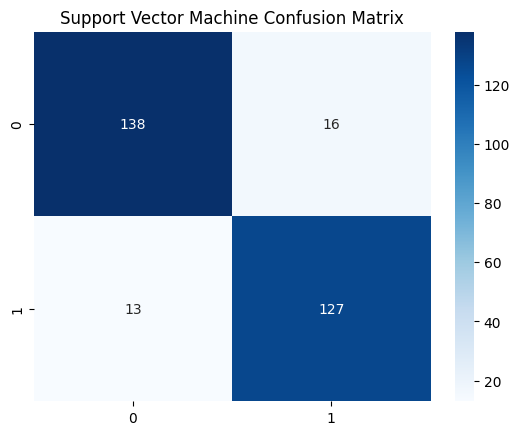

Support Vector Machine 2:
 Accuracy: 0.8877551020408163
 Precision: 0.8602150537634409
 Recall: 0.898876404494382
 F1 Score: 0.8791208791208791


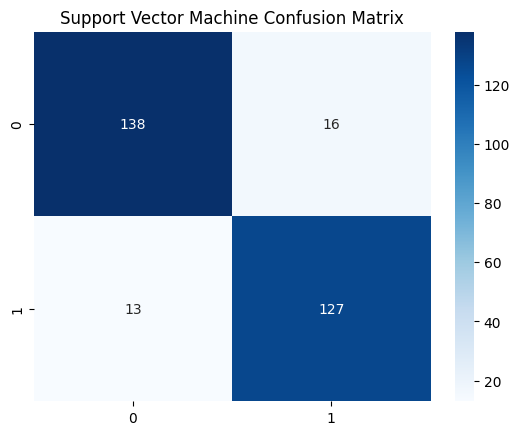

In [331]:
print(f'Support Vector Machine 1:\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()


print(f'Support Vector Machine 2:\n Accuracy: {accuracy_svm2}\n Precision: {precision_svm2}\n Recall: {recall_svm2}\n F1 Score: {f1_svm2}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

#### Naive Bayes

In [332]:
# Naive Bayes 1
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

# Naive Bayes 2
nb_model2 = GaussianNB()
nb_model2.fit(x_train2, y_train2)
y_pred_nb2 = nb_model2.predict(x_test2)

In [333]:
# Naive Bayes Evaluation 1
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Naive Bayes Evaluation 2
accuracy_nb2 = accuracy_score(y_test2, y_pred_nb2)
precision_nb2 = precision_score(y_test2, y_pred_nb2)
recall_nb2 = recall_score(y_test2, y_pred_nb2)
f1_nb2 = f1_score(y_test2, y_pred_nb2)
cm_nb2 = confusion_matrix(y_test2, y_pred_nb2)

Naive Bayes 1:
 Accuracy: 0.8639455782312925
 Precision: 0.8472222222222222
 Recall: 0.8714285714285714
 F1 Score: 0.8591549295774648


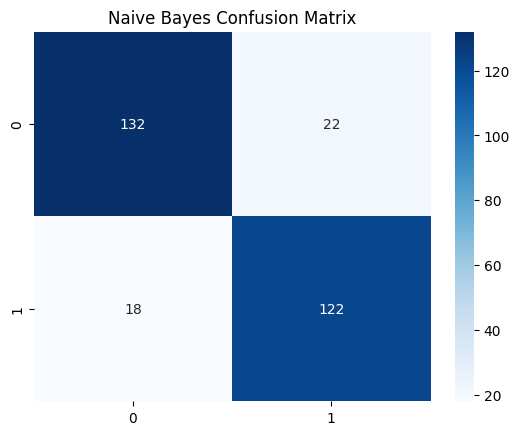

Naive Bayes 2:
 Accuracy: 0.8571428571428571
 Precision: 0.8144329896907216
 Recall: 0.8876404494382022
 F1 Score: 0.8494623655913979


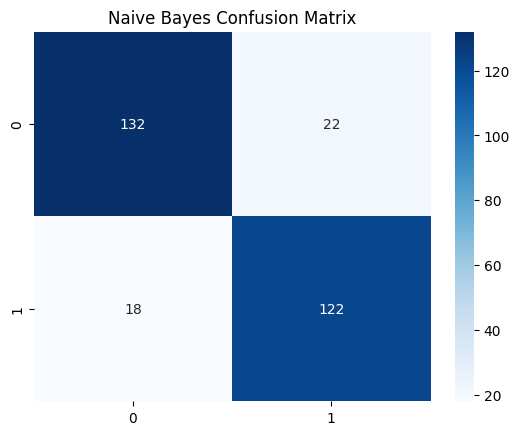

In [334]:
print(f'Naive Bayes 1:\n Accuracy: {accuracy_nb}\n Precision: {precision_nb}\n Recall: {recall_nb}\n F1 Score: {f1_nb}')
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

print(f'Naive Bayes 2:\n Accuracy: {accuracy_nb2}\n Precision: {precision_nb2}\n Recall: {recall_nb2}\n F1 Score: {f1_nb2}')
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

#### Random Forest

In [335]:
# Random Forest 1
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Random Forest 2
rf_model2 = RandomForestClassifier(random_state=42)
rf_model2.fit(x_train2, y_train2)
y_pred_rf2 = rf_model2.predict(x_test2)

In [336]:
# Random Forest Evaluation 1
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Random Forest Evaluation 2
accuracy_rf2 = accuracy_score(y_test2, y_pred_rf2)
precision_rf2 = precision_score(y_test2, y_pred_rf2)
recall_rf2 = recall_score(y_test2, y_pred_rf2)
f1_rf2 = f1_score(y_test2, y_pred_rf2)
cm_rf2 = confusion_matrix(y_test2, y_pred_rf2)

Random Forest 1:
 Accuracy: 0.9115646258503401
 Precision: 0.8904109589041096
 Recall: 0.9285714285714286
 F1 Score: 0.9090909090909091


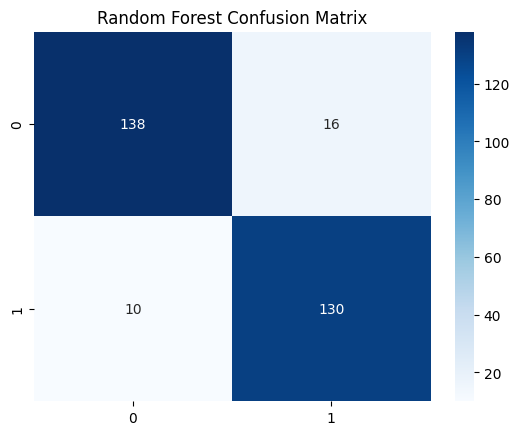

Random Forest 2:
 Accuracy: 0.8928571428571429
 Precision: 0.8617021276595744
 Recall: 0.9101123595505618
 F1 Score: 0.8852459016393442


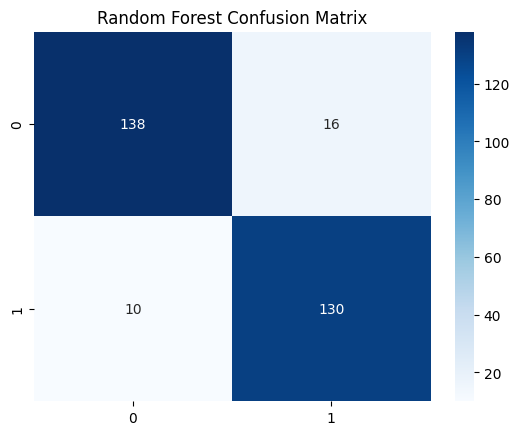

In [337]:
print(f'Random Forest 1:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

print(f'Random Forest 2:\n Accuracy: {accuracy_rf2}\n Precision: {precision_rf2}\n Recall: {recall_rf2}\n F1 Score: {f1_rf2}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

---
---

### **Cose scartate**

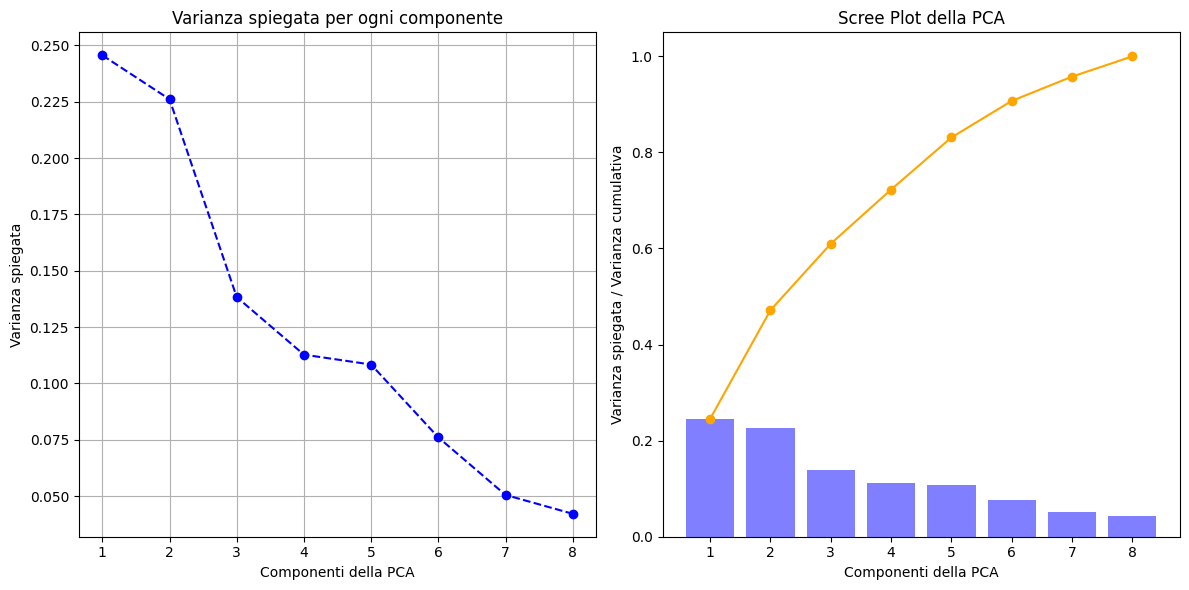

In [338]:

# NON USARE
# DANNEGGIA NOSTRO PROGETTO


from sklearn.decomposition import PCA

# Applicare PCA mantenendo tutte le componenti principali
pca = PCA(n_components=len(X_resampled.columns))
X_pca = pca.fit_transform(X_resampled)

# Ottenere la varianza spiegata da ogni componente
explained_variance = pca.explained_variance_ratio_

# Calcolare la varianza spiegata cumulativa
cumulative_variance = np.cumsum(explained_variance)

# Creazione dei due grafici: Varianza spiegata e Scree Plot
plt.figure(figsize=(12, 6))

# Grafico della varianza spiegata per ogni componente
plt.subplot(1, 2, 1)
plt.plot(range(1, pca.n_components_ + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Varianza spiegata per ogni componente")
plt.grid()

# Scree Plot con varianza cumulativa
plt.subplot(1, 2, 2)
plt.bar(range(1, pca.n_components_ + 1), explained_variance, color='blue', alpha=0.5, align='center')
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata / Varianza cumulativa')
plt.title("Scree Plot della PCA")

plt.tight_layout()
plt.show()

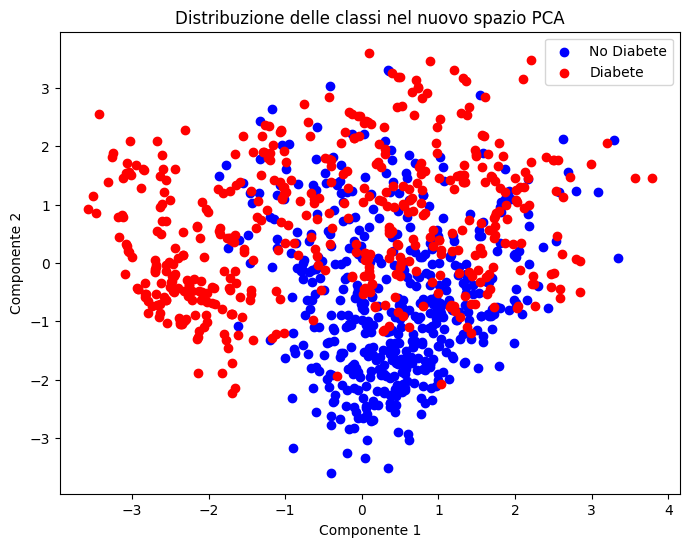

In [339]:
# Scatter plot delle prime due componenti principali (PCA)
target_name = 'Outcome'  # Nome del target
unique_labels = np.unique(y_resampled)  # Trova le classi uniche (0 e 1)

fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot delle prime due componenti della PCA
for label in unique_labels:
    mask = (y_resampled == label).values  # Seleziona i punti della classe specifica
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1],
               color='blue' if label == 0 else 'red',
               label='No Diabete' if label == 0 else 'Diabete')

# Etichette degli assi
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')

# Legenda per distinguere le classi
ax.legend()

plt.title("Distribuzione delle classi nel nuovo spazio PCA")
plt.show()